In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'Comorbidities'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [7]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [8]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [10]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train_old, y_train_old)
Counter(y_train)

Counter({0.0: 115, 1.0: 115})

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       115
         1.0       0.81      0.83      0.82       115

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230

[[92 23]
 [19 96]]
root mean squared error (RMSE): 0.42732738696715183
R-squared (R2 ): 0.26956521739130435
MAE 0.1826086956521739

Testing SET
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80       250
         1.0       0.30      0.75      0.43        44

    accuracy                           0.70       294
   macro avg       0.62      0.72      0.61       294
weighted avg       0.84      0.70      0.74       294

[[173  77]
 [ 11  33]]
root mean squared error (RMSE): 0.5471012044321932
R-squared (R2 ): -1.3519999999999999
MAE 0.29931972789115646



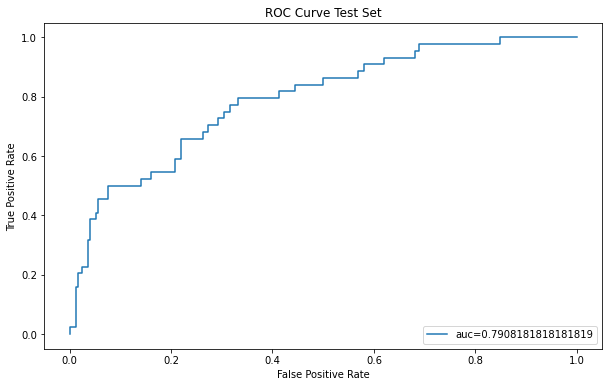

In [12]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [13]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
25                 Leucocyte    0.770613
42             Magnesium ion    0.674663
12                heart rate    0.510167
41                 Anion gap    0.383901
46                      PCO2    0.374886
31                       INR    0.341318
35             Urea nitrogen    0.335357
13   Systolic blood pressure    0.312429
0                        age    0.297294
3               hypertensive    0.282566
24                       RDW    0.227256
20                       RBC    0.204989
15          Respiratory rate    0.200848
43                        PH    0.175209
5             CHD with no MI    0.153530
36                   glucose    0.139069
28                 Basophils    0.114129
4         atrialfibrillation    0.077021
45               Lactic acid    0.066385
6                   diabetes    0.065173
23                       MCV    0.062025
37           Blood potassium    0.048228
40                  Chloride    0.000465
21              

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70       250
         1.0       0.22      0.68      0.33        44

    accuracy                           0.59       294
   macro avg       0.56      0.63      0.52       294
weighted avg       0.81      0.59      0.65       294

[[143 107]
 [ 14  30]]
root mean squared error (RMSE): 0.6415330278717848
R-squared (R2 ): -2.2339999999999995
MAE 0.41156462585034015



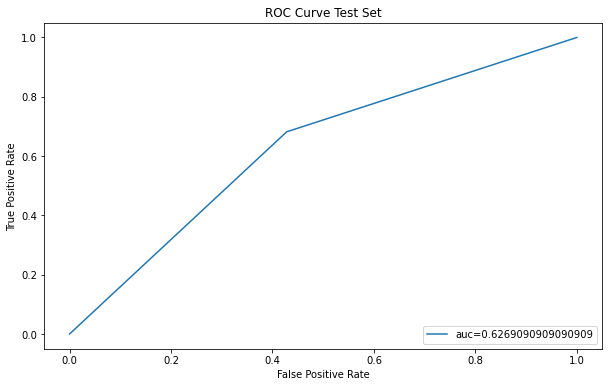

In [14]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81       250
         1.0       0.32      0.75      0.45        44

    accuracy                           0.72       294
   macro avg       0.63      0.73      0.63       294
weighted avg       0.85      0.72      0.76       294

[[179  71]
 [ 11  33]]
root mean squared error (RMSE): 0.5281207860194961
R-squared (R2 ): -1.1916363636363632
MAE 0.2789115646258503



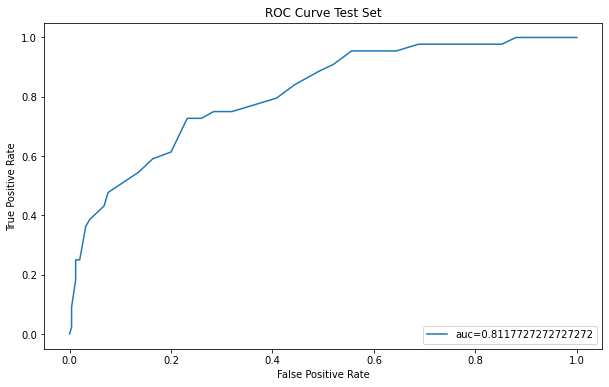

In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [16]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.06352525906613252, 'Leucocyte'),
 (0.054138106400258366, 'Urine output'),
 (0.05008368668975256, 'Bicarbonate'),
 (0.04670032077876562, 'Lymphocyte'),
 (0.045047807766862694, 'Systolic blood pressure'),
 (0.04077177747644572, 'Blood calcium'),
 (0.03899849150609934, 'heart rate'),
 (0.03452784501352091, 'Anion gap'),
 (0.03182872045230574, 'Urea nitrogen'),
 (0.03167683403655999, 'RDW'),
 (0.03149529464906124, 'PH'),
 (0.031003302578497656, 'Blood sodium'),
 (0.024803914012888364, 'Neutrophils'),
 (0.02348673535959045, 'BMI'),
 (0.022971975871993816, 'PT'),
 (0.022081730341028206, 'Blood potassium'),
 (0.021632379082682323, 'Lactic acid'),
 (0.02152971764940158, 'age'),
 (0.02117428921477306, 'temperature'),
 (0.02075209462104956, 'INR'),
 (0.020025585077051697, 'Chloride'),
 (0.019979959226511544, 'PCO2'),
 (0.019938832684756522, 'Magnesium ion'),
 (0.019695247705017505, 'glucose'),
 (0.019177744881739654, 'Respiratory rate'),
 (0.018991234900410253, 'SP O2'),
 (0.0185480615157419

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       250
         1.0       0.37      0.75      0.49        44

    accuracy                           0.77       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.86      0.77      0.80       294

[[193  57]
 [ 11  33]]
root mean squared error (RMSE): 0.4809288065886704
R-squared (R2 ): -0.8174545454545452
MAE 0.23129251700680273



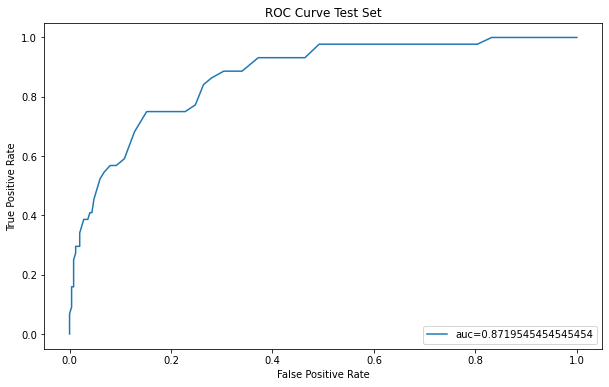

In [17]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80       250
         1.0       0.29      0.68      0.41        44

    accuracy                           0.70       294
   macro avg       0.61      0.69      0.60       294
weighted avg       0.83      0.70      0.74       294

[[176  74]
 [ 14  30]]
root mean squared error (RMSE): 0.5471012044321932
R-squared (R2 ): -1.3519999999999999
MAE 0.29931972789115646



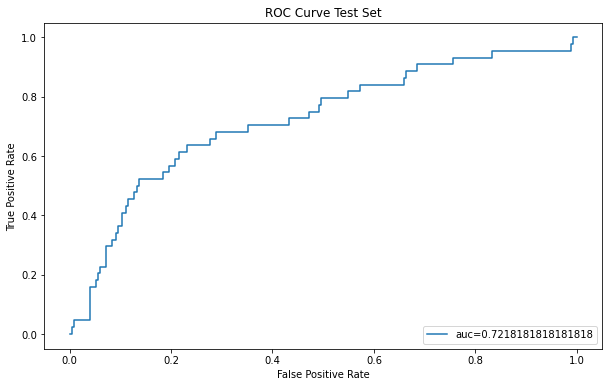

In [18]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.70      0.80       250
         1.0       0.28      0.66      0.39        44

    accuracy                           0.69       294
   macro avg       0.60      0.68      0.59       294
weighted avg       0.82      0.69      0.74       294

[[175  75]
 [ 15  29]]
root mean squared error (RMSE): 0.5532833351724882
R-squared (R2 ): -1.4054545454545453
MAE 0.30612244897959184



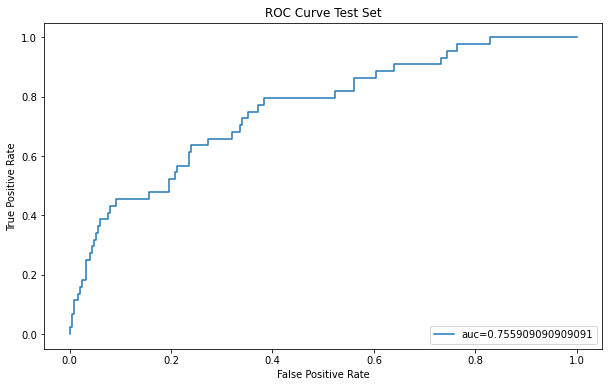

In [19]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81       250
         1.0       0.32      0.80      0.46        44

    accuracy                           0.72       294
   macro avg       0.64      0.75      0.63       294
weighted avg       0.86      0.72      0.76       294

[[176  74]
 [  9  35]]
root mean squared error (RMSE): 0.5313312762957475
R-squared (R2 ): -1.218363636363636
MAE 0.282312925170068



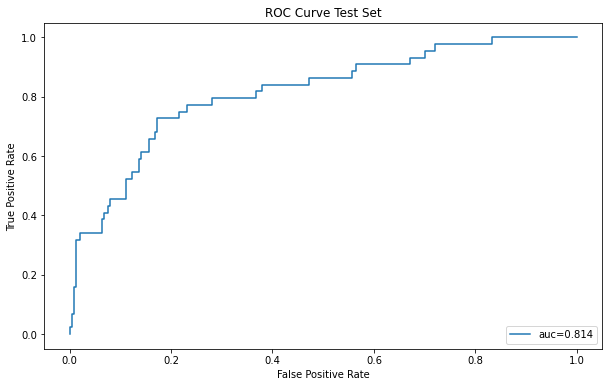

In [20]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [25]:
# List the features sorted in descending order by feature importance
sorted(zip(xgb.feature_importances_, X.columns), reverse=True)

[(0.10477083, 'Bicarbonate'),
 (0.057134595, 'Urine output'),
 (0.05359638, 'deficiencyanemias'),
 (0.04198063, 'INR'),
 (0.040933453, 'Systolic blood pressure'),
 (0.040915474, 'Lymphocyte'),
 (0.03488438, 'Renal failure'),
 (0.03324655, 'Leucocyte'),
 (0.032361567, 'Blood calcium'),
 (0.030554488, 'Blood sodium'),
 (0.026907291, 'PT'),
 (0.025506273, 'Respiratory rate'),
 (0.025214644, 'PH'),
 (0.024029668, 'Creatine kinase'),
 (0.024009865, 'MCV'),
 (0.023851434, 'Magnesium ion'),
 (0.023837838, 'RDW'),
 (0.023811676, 'Chloride'),
 (0.02341964, 'Lactic acid'),
 (0.022495857, 'Urea nitrogen'),
 (0.022012308, 'hematocrit'),
 (0.021546641, 'Basophils'),
 (0.020529078, 'age'),
 (0.020032814, 'heart rate'),
 (0.019034963, 'RBC'),
 (0.017654615, 'EF'),
 (0.017313218, 'Platelets'),
 (0.016222239, 'Neutrophils'),
 (0.01590034, 'BMI'),
 (0.0149802305, 'Blood potassium'),
 (0.014122502, 'glucose'),
 (0.011792635, 'NT-proBNP'),
 (0.010736996, 'temperature'),
 (0.010266512, 'SP O2'),
 (0.010125

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

[[115   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       250
         1.0       0.32      0.77      0.46        44

    accuracy                           0.72       294
   macro avg       0.64      0.74      0.64       294
weighted avg       0.85      0.72      0.76       294

[[179  71]
 [ 10  34]]
root mean squared error (RMSE): 0.5248906591678238
R-squared (R2 ): -1.1649090909090907
MAE 0.2755102040816326



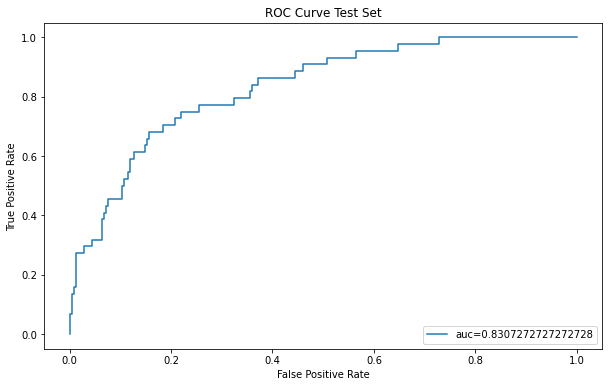

In [21]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       115
         1.0       0.92      0.94      0.93       115

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230

[[105  10]
 [  7 108]]
root mean squared error (RMSE): 0.27186953392806057
R-squared (R2 ): 0.7043478260869565
MAE 0.07391304347826087

Testing SET
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82       250
         1.0       0.34      0.82      0.48        44

    accuracy                           0.74       294
   macro avg       0.65      0.77      0.65       294
weighted avg       0.87      0.74      0.77       294

[[181  69]
 [  8  36]]
root mean squared error (RMSE): 0.511766315719159
R-squared (R2 ): -1.0579999999999998
MAE 0.2619047619047619



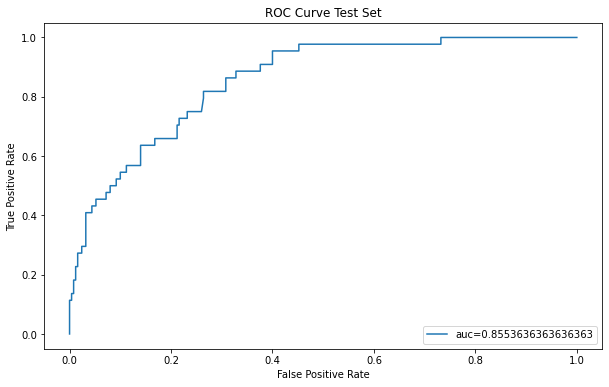

In [22]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

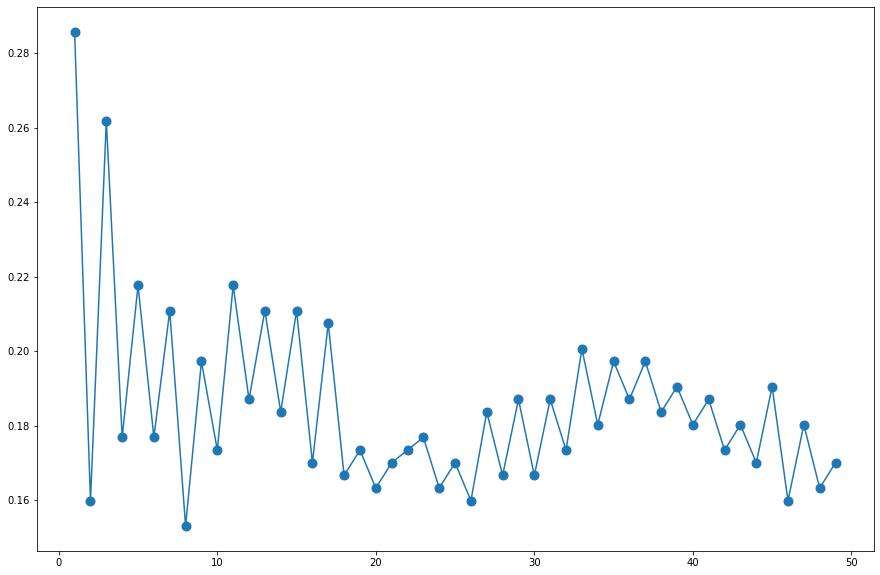

In [23]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       115
         1.0       0.85      0.69      0.76       115

    accuracy                           0.78       230
   macro avg       0.79      0.78      0.78       230
weighted avg       0.79      0.78      0.78       230

[[101  14]
 [ 36  79]]
root mean squared error (RMSE): 0.4662524041201569
R-squared (R2 ): 0.13043478260869568
MAE 0.21739130434782608

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       250
         1.0       0.37      0.66      0.48        44

    accuracy                           0.78       294
   macro avg       0.65      0.73      0.67       294
weighted avg       0.85      0.78      0.80       294

[[201  49]
 [ 15  29]]
root mean squared error (RMSE): 0.46656947481584343
R-squared (R2 ): -0.7105454545454544
MAE 0.21768707482993196



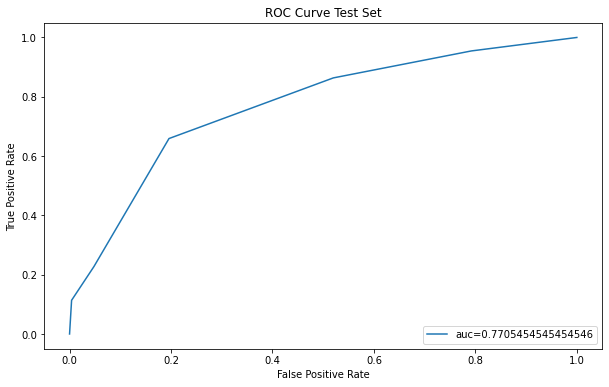

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)